## Import module

In [1]:
import sys
sys.path.insert(0, "../")
from diffusive_solver import * 

## Load geometry file and build geometry

In [2]:
output_folder = 'testing_results'
sample = load_sample_geometry('geometry_constriction.txt')
geometry = build_geometry(**sample, n_fields = 2, resolution = 20)

## Define coefficients

In [3]:
step = create_cellfunction(geometry['mesh'], lambda x, y: np.tanh(x - 2.))
cc = Matrix_Expression([1.], dimension = 1)	
tt = Matrix_Expression([2.], dimension = 1, scalar = True)
ct = Matrix_Expression([step], dimension = 1)
L = [[cc,ct],
     [ct,tt]]
Gamma = [[dol.Constant(0),dol.Constant(0)],
         [dol.Constant(0),dol.Constant(5)]]

#! cc * tt -ct**2 > 0 for L to be positive defined 

## Solve FEM

In [4]:
solution_dic = solve_FEM(geometry = geometry, L = L, Gamma = Gamma, biases = np.atleast_2d([[0.,1.],
                                                                                            [0.,0.]]))

In [5]:
fields = calculate_fields(**solution_dic)

/home/itorre/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


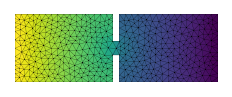

In [6]:
plt.figure(figsize = (1.5,1))
plt.axes([0.05,0.275,0.9,0.45])
plt.xlim(0,3)
plt.ylim(0,1)
plt.axis('equal')
plt.tight_layout()

plt.axis('off')
plt.triplot(geometry['coordinates'][:,0],
           geometry['coordinates'][:,1],
           geometry['cells'],
           c='k',lw=0.1)
plt.tripcolor(geometry['coordinates'][:,0],
           geometry['coordinates'][:,1],
           geometry['cells'], 
           fields['fields_vertices'][0,:] )
plt.savefig('logo.png', dpi = 300)